#                                        Data Story and Visualization

This is the import of all the python packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import matplotlib as mpl
from geonamescache import GeonamesCache
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
## This is the working directory I saved for latter use

work_directory=os.getcwd()
work_directory

'C:\\Users\\Tsymbal Group Member\\OneDrive - University of Nebraska-Lincoln\\data_camp\\Springbroad\\SpringBoard_Projects\\project_data'

## Part 1.Map visulization of the Happniess Score

The dataset **2012_0.csv** is part of the dataset I got from gallup world happiness investigation. This is only for the year 2012

In [7]:
df=pd.read_csv(work_directory+'\\2012_0.csv', sep=', ', delimiter=',')
# dff=df.drop('Unnamed: 0',axis=1)
df.head()

,country,year,Life Ladder,Log GDP per capita,Confidence in national government,Social support,Healthy life expectancy at birth,Generosity,"GINI index (World Bank estimate), average 2000-13"
0,Afghanistan,2012,3.782938,7.549241,0.435440,0.520637,48.738346,0.247900,NaN
1,Albania,2012,5.510124,9.189268,0.364894,0.784502,67.942978,-0.169465,0.305000
2,Algeria,2012,5.604596,9.487703,NaN,0.839397,64.001305,-0.198894,NaN
3,Angola,2012,4.360250,8.886378,0.237091,0.752593,44.400314,-0.138073,0.473400
4,Argentina,2012,6.468387,NaN,0.418255,0.901776,66.838005,NaN,0.479421


This is the dataset from where we can get the ISO 3166 alpha-3 country code. This dataset ***is not*** to modelling the trends, is only for the world map visualization

In [8]:
country_code=pd.read_csv(work_directory+'\\slim-3.csv', sep=', ', delimiter=',')
country_code=country_code.rename(columns={'name': 'country'})
country_code.head(5)

,country,alpha-3
0,Afghanistan,AFG
1,Åland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM


In [9]:
##  I merged this two dataset based on the 2012_0, since it is the dataset where we have all the features

dfs=df.merge(country_code,on='country')
dfs.head()

,country,year,Life Ladder,Log GDP per capita,Confidence in national government,Social support,Healthy life expectancy at birth,Generosity,"GINI index (World Bank estimate), average 2000-13",alpha-3
0,Afghanistan,2012,3.782938,7.549241,0.435440,0.520637,48.738346,0.247900,NaN,AFG
1,Albania,2012,5.510124,9.189268,0.364894,0.784502,67.942978,-0.169465,0.305000,ALB
2,Algeria,2012,5.604596,9.487703,NaN,0.839397,64.001305,-0.198894,NaN,DZA
3,Angola,2012,4.360250,8.886378,0.237091,0.752593,44.400314,-0.138073,0.473400,AGO
4,Argentina,2012,6.468387,NaN,0.418255,0.901776,66.838005,NaN,0.479421,ARG


In [10]:
# data for the map

data_map=dfs[['country','alpha-3','year','Life Ladder']]
data_map.head()

,country,alpha-3,year,Life Ladder
0,Afghanistan,AFG,2012,3.782938
1,Albania,ALB,2012,5.510124
2,Algeria,DZA,2012,5.604596
3,Angola,AGO,2012,4.360250
4,Argentina,ARG,2012,6.468387


### Starting from this line, the reset of the code till the map visulization is used for the purpose of plotting. The code is basically from the tutorial: (http://ramiro.org/notebook/basemap-choropleth/)

In [11]:
shapefile = work_directory+'\\countries\\ne_10m_admin_0_countries'
num_colors = 9
year = '2012'
cols = ['country', 'alpha-3', year]
title = 'Happiness score {}'.format(year)

In [12]:
gc = GeonamesCache()
iso2_codes = list(gc.get_dataset_by_key(gc.get_countries(), 'iso3').keys())

In [13]:
data_map.set_index('alpha-3', inplace=True)
data_map = data_map.ix[iso2_codes].dropna()


In [14]:
values = data_map['Life Ladder']
cm = plt.get_cmap('Spectral')
scheme = [cm(i*30) for i in range(num_colors)][::-1]
# scheme=[(15,75,50,0),(3,57,63,0),(0,32,55,0),(0,12,42,0),(0,0,25,0),(10,0,40,0),(33,0,33,0),(60,0,30,0),(82,23,0,0)]
bins = np.linspace(values.min(), values.max(), num_colors)
data_map['bin'] = np.digitize(values, bins) - 1 
data_map.sort_values('bin', ascending=False).head()

,country,year,Life Ladder,bin
alpha-3,,,,
CHE,Switzerland,2012.0,7.776209,8
AUT,Austria,2012.0,7.400689,7
NLD,Netherlands,2012.0,7.470716,7
ARE,United Arab Emirates,2012.0,7.217767,7
DNK,Denmark,2012.0,7.519909,7


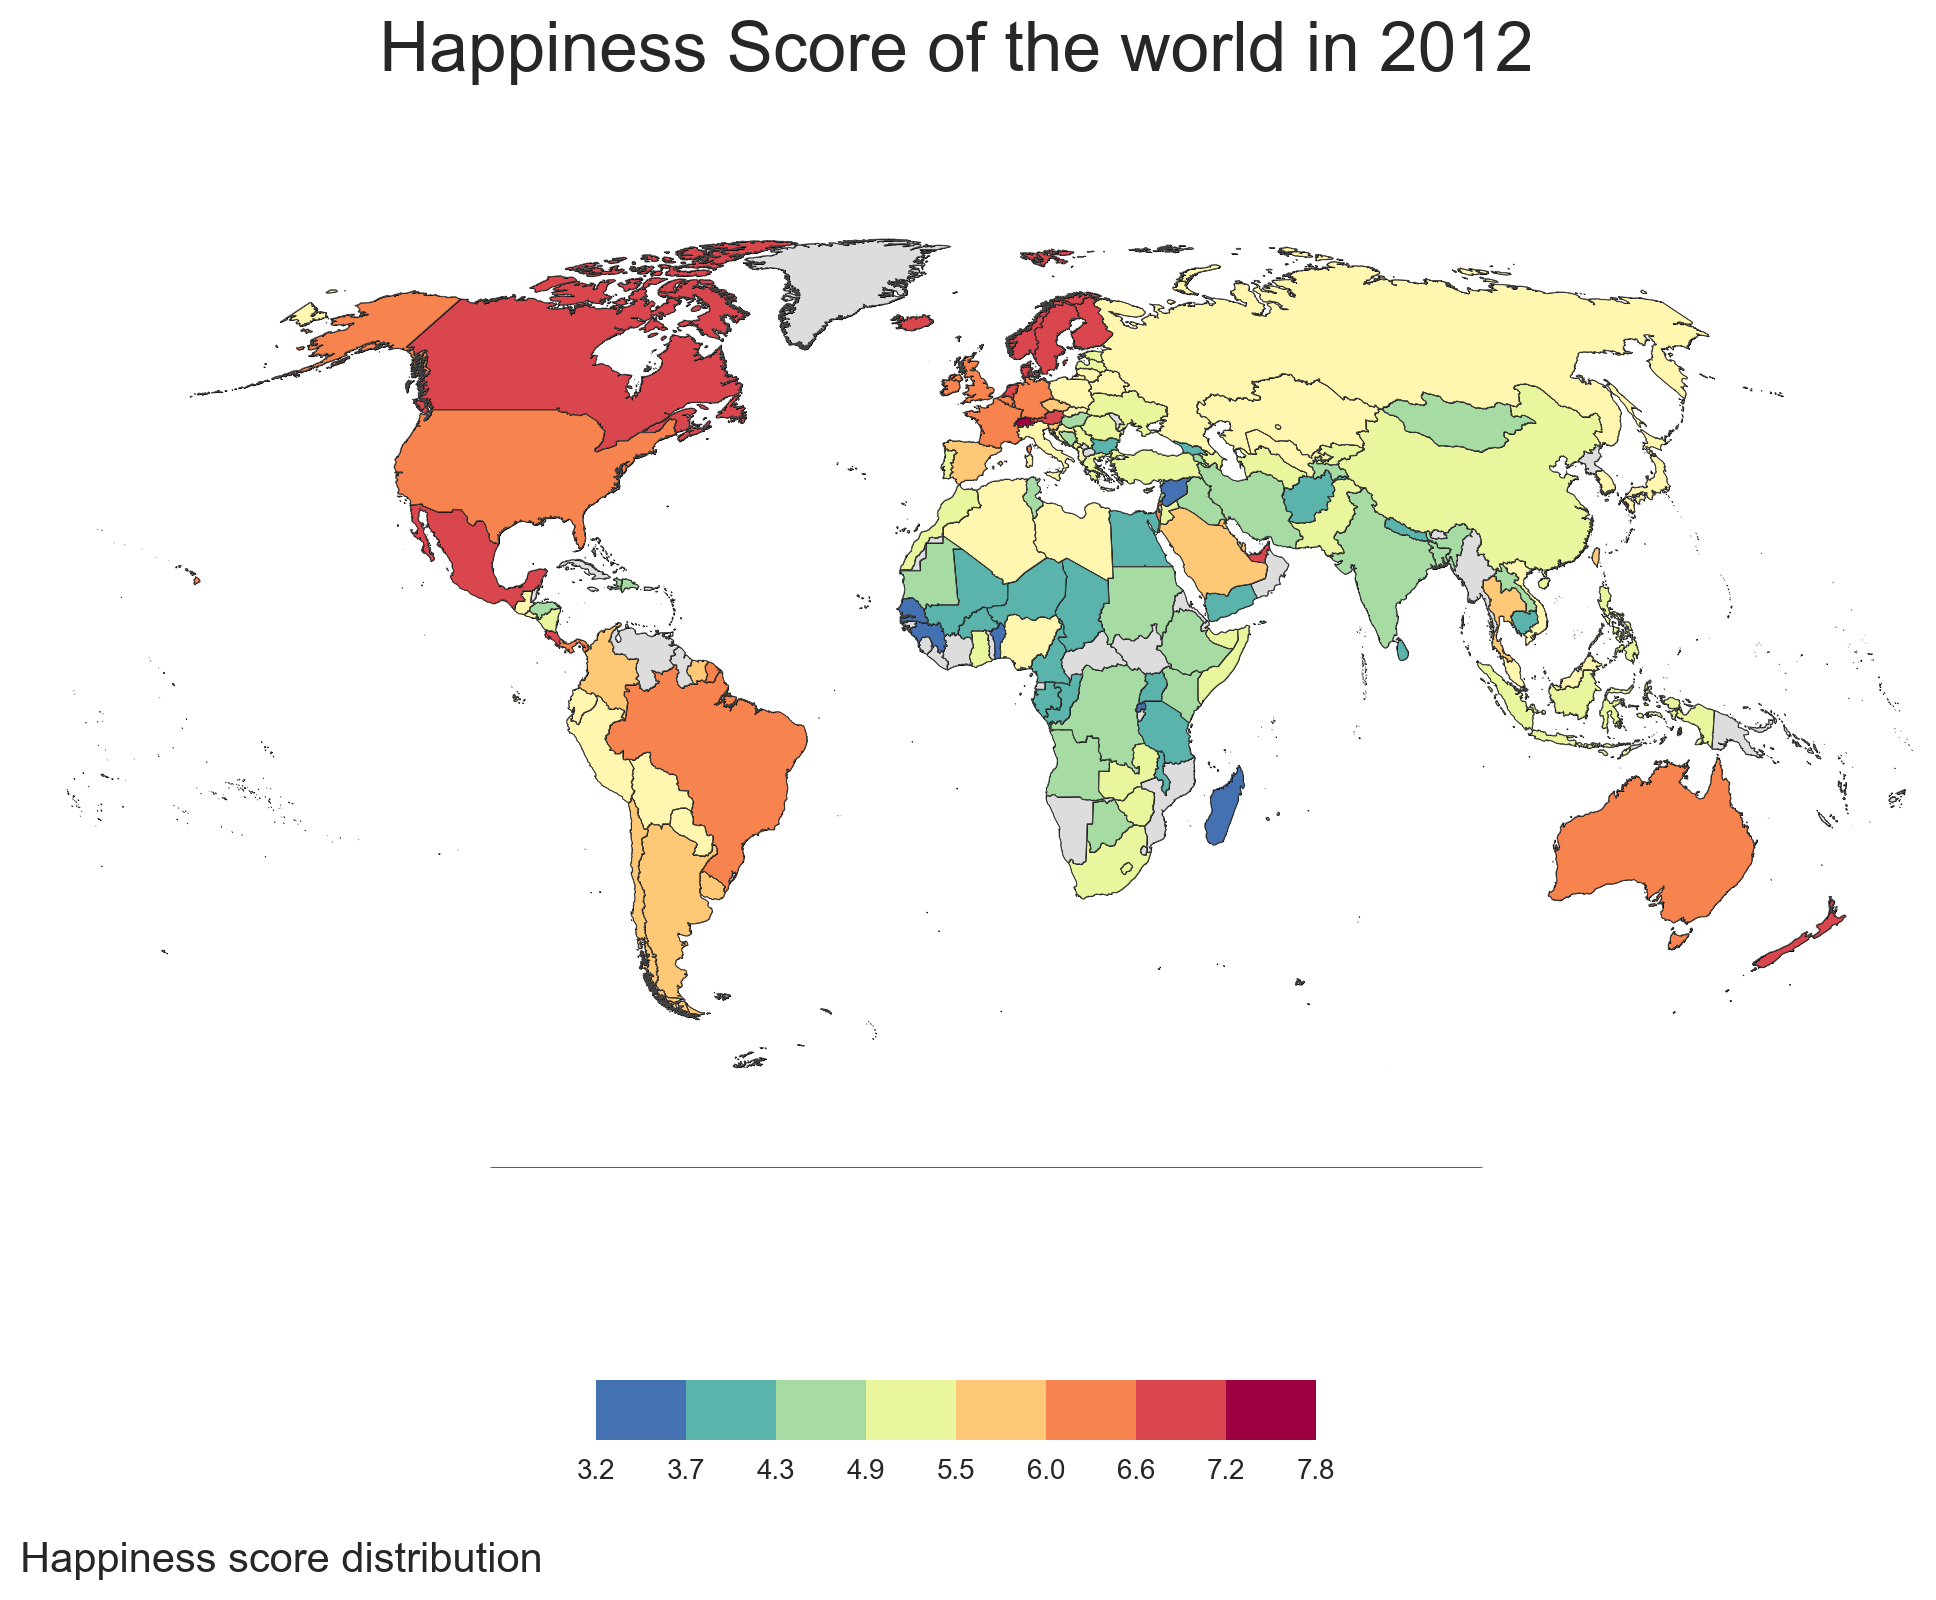

In [17]:
%config InlineBackend.figure_format = 'retina'
fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(111, axisbg='w', frame_on=False)
fig.suptitle('Happiness Score of the world in {}'.format(year), fontsize=25, y=.85)

m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='w')


m.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)
for info, shape in zip(m.units_info, m.units):
    iso2 = info['ADM0_A3_US']
    if iso2 not in data_map.index:
        color = '#dddddd'
    else:
        color = scheme[data_map.ix[iso2]['bin']]
    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)


# Cover up Antarctica so legend can be placed over it.
ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)

# Draw color legend.
ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

# Set the map footer.
description="Happiness score distribution"
plt.annotate(description, xy=(-.8, -2.2), size=15, xycoords='axes fraction')

# plt.savefig(imgfile, bbox_inches='tight', pad_inches=.2)
plt.show()

The gray area is because of lacking of data. However, for south sudan, Basemap can only show the contour. The country has the darker red means it has a high happiness score. From this distribution, we can see the basic trend is that for countries in American and Europe, they have a high happiness score, but the countries in affrica, they have lower happiness score. This indeed has some relation with the country's developing level

In [223]:
datatime=pd.read_csv(work_directory+'\\dataset\data_0.csv',sep=',')
datatime.head()

,﻿WP5 Country,country,year,Life Ladder,Log GDP per capita,Confidence in national government,Social support,Healthy life expectancy at birth,Generosity,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13"
0,Afghanistan,Afghanistan,2008,3.723590,7.197130,0.612072,0.450662,47.550438,0.183399,NaN,NaN
1,Afghanistan,Afghanistan,2009,4.401778,7.362664,0.611545,0.552308,47.859673,0.204900,NaN,NaN
2,Afghanistan,Afghanistan,2010,4.758381,7.416260,0.299357,0.539075,48.159512,0.138773,NaN,NaN
3,Afghanistan,Afghanistan,2011,3.831719,7.445761,0.307386,0.521104,48.451160,0.176339,NaN,NaN
4,Afghanistan,Afghanistan,2012,3.782938,7.549241,0.435440,0.520637,48.738346,0.247900,NaN,NaN


In [224]:
datatime=datatime[['country','year','Life Ladder','Log GDP per capita']]

In [225]:
datatime=datatime[datatime['country'].isin(['China','India','United States'])]

In [231]:
chinadf=datatime.reset_index().set_index(['country','year']).loc['China']
usadf=datatime.reset_index().set_index(['country','year']).loc['United States']
rusdf=datatime.reset_index().set_index(['country','year']).loc['India']

In [232]:
chinadf=chinadf.reset_index()
usadf=usadf.reset_index()
rusdf=rusdf.reset_index()

In [234]:
rusdf

,year,index,Life Ladder,Log GDP per capita
0,2006,479,5.348259,8.148173
1,2007,480,5.026793,8.226646
2,2008,481,5.145833,8.250190
3,2009,482,4.521518,8.317389
4,2010,483,4.989277,8.401317
5,2011,484,4.634871,8.452306
6,2012,485,4.720147,8.489013
7,2013,486,4.427789,8.543217
8,2014,487,4.424379,8.601280
9,2015,488,4.342079,8.659320


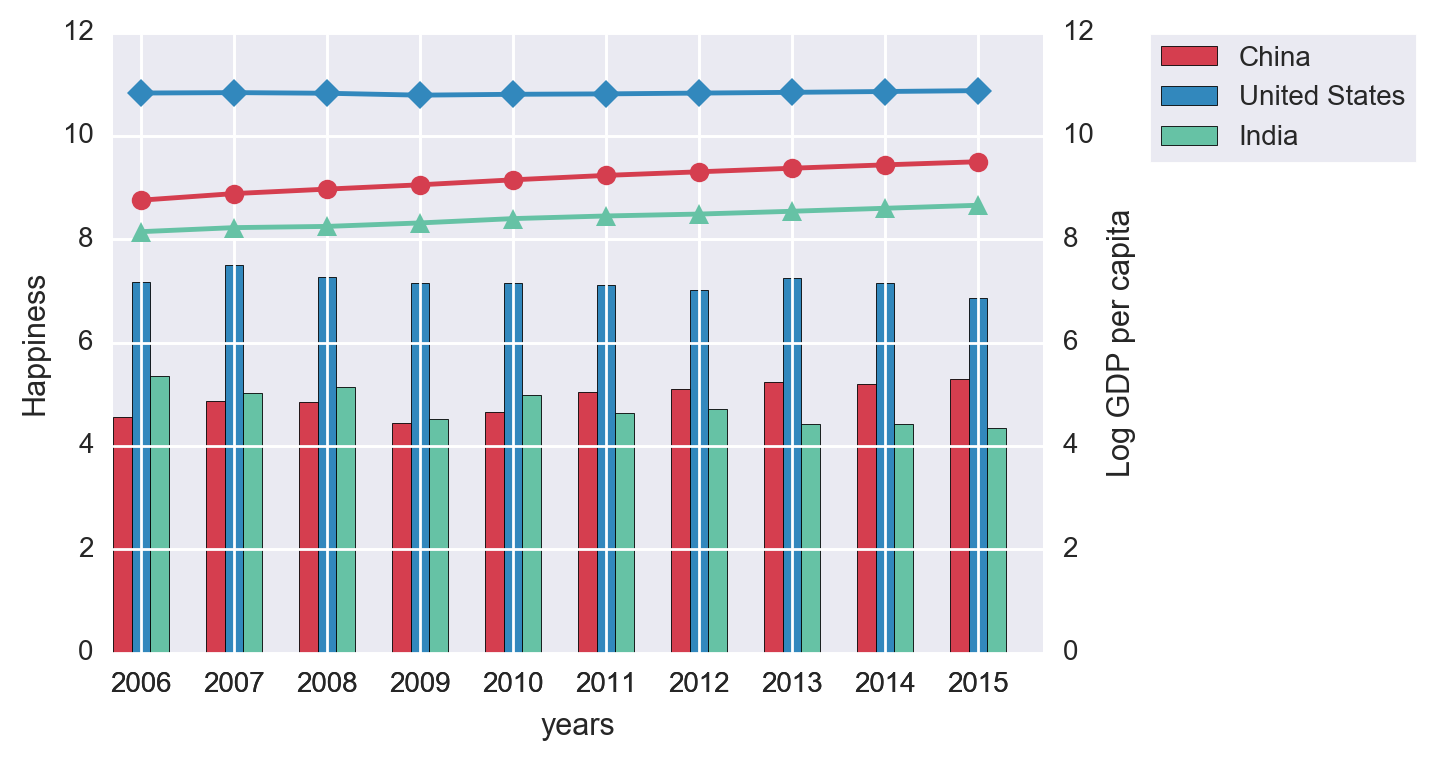

In [240]:
fig1=plt.figure(figsize=(6,4))


axes = fig1.add_subplot(111)
bar_width = 0.2
index = np.arange(10)
axes.bar(index, chinadf['Life Ladder'],width=0.2,color='#d53e4f',label='China')
axes.bar(index+bar_width,usadf['Life Ladder'],width=0.2,color='#3288bd',label='United States')
axes.bar(index+bar_width*2,rusdf['Life Ladder'],width=0.2,color='#66c2a5',label='India')

# ax2 = axes.twinx()
ax2 = fig1.add_subplot(111, sharex=axes, frameon=False)
shift=0.0
ax2.plot(index+0.3, chinadf['Log GDP per capita']+shift,'o-',color='#d53e4f',label='China')
ax2.plot(index+0.3, usadf['Log GDP per capita']+shift,'D-',color='#3288bd',label='United States')
ax2.plot(index+0.3, rusdf['Log GDP per capita']+shift,'^-',color='#66c2a5',label='India')

axes.set_xlabel('years')
axes.set_ylabel("Happiness")
axes.set_xticks(index+0.3)
axes.set_xticklabels(('2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014','2015'))
axes.set_ylim(0,12.0)

ax2.set_ylabel("Log GDP per capita")
ax2.set_ylim(0,12.0)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
    
leg=axes.legend(loc=2, bbox_to_anchor=(1.1, 1.02))
leg.draw_frame(True)

# axes.tight_layout()

## Part 2 Correlation of data and The stories of data

In [18]:
dataset=pd.read_csv('dataframe.csv',sep=',')

In [19]:
dataset.head()

,country,year,Happiness,Log GDP per capita,Confidence in national government,Social support,Healthy life expectancy at birth,Generosity,"GINI index (World Bank estimate), average 2000-13",child,...,visitor,income,homicide,ecoFree,uniEnro,aveVis,alcohol,umemploy,food,suicide
0,Afghanistan,2012,3.782938,7.549241,0.435440,0.520637,48.738346,0.247900,0.300000,99.5,...,0,512,6.6,1.0,4.0,652860,0.01,8.5,2100.0,5.7
1,Albania,2012,5.510124,9.189268,0.364894,0.784502,67.942978,-0.169465,0.305000,15.5,...,3156000,4245,5.5,65.1,58.6,27400,5.14,13.9,3023.0,5.9
2,Algeria,2012,5.604596,9.487703,NaN,0.839397,64.001305,-0.198894,NaN,26.1,...,2634000,4532,1.3,51.0,32.2,2381740,0.66,11.0,3272.0,1.9
3,Angola,2012,4.360250,8.886378,0.237091,0.752593,44.400314,-0.138073,0.473400,172.2,...,528000,3505,9.8,46.7,6.9,1246700,8.24,6.9,2384.0,13.8
4,Argentina,2012,6.468387,9.805600,0.418255,0.901776,66.838005,-0.160000,0.479421,13.8,...,5587000,10391,6.6,48.0,79.0,2736690,8.35,7.2,3155.0,10.3


In [20]:
dataset.columns

Index([u'country', u'year', u'Happiness', u'Log GDP per capita',
       u'Confidence in national government', u'Social support',
       u'Healthy life expectancy at birth', u'Generosity',
       u'GINI index (World Bank estimate), average 2000-13', u'child',
       u'healthExp', u'publicEdu', u'visitor', u'income', u'homicide',
       u'ecoFree', u'uniEnro', u'aveVis', u'alcohol', u'umemploy', u'food',
       u'suicide'],
      dtype='object')

### Picture Happiness distribution:

Now let's look at the Happiness distribution, to see if we can get some general idea about our life

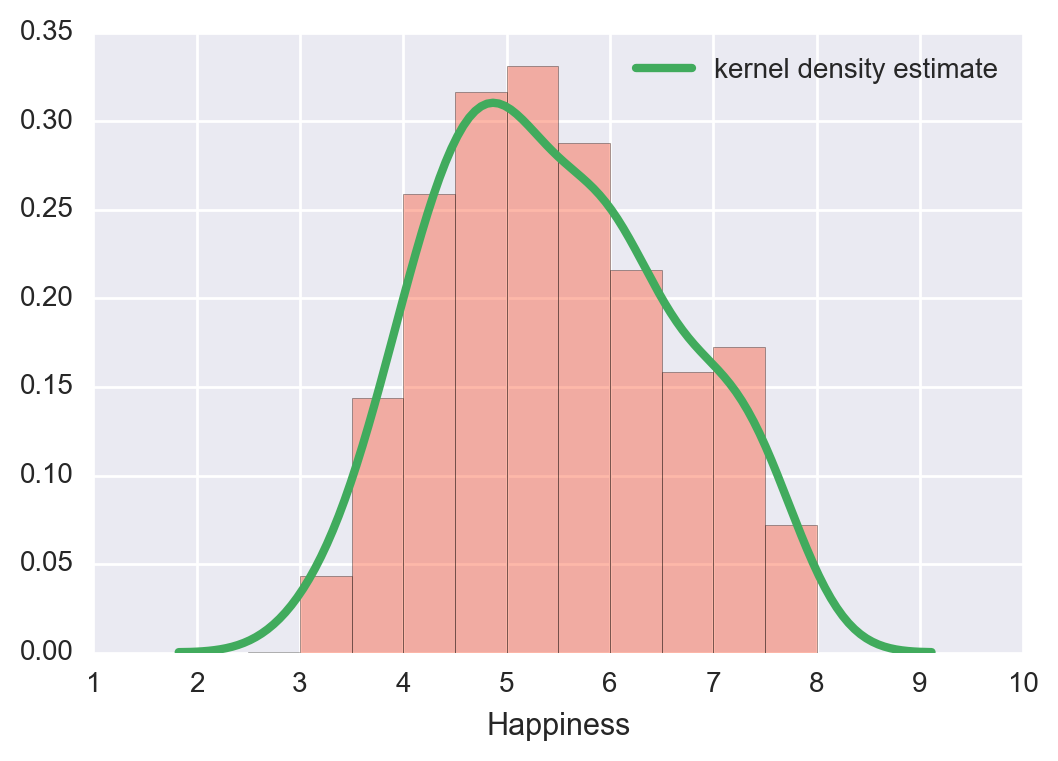

In [21]:
fig, axes = plt.subplots(1, 1, figsize=(6,4))
bins=[2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0]
kde_kws={"color": "#41ab5d", "lw": 3, "label": "kernel density estimate"}
sb.distplot(dataset['Happiness'],bins=bins, kde=True, rug=False,fit=None, hist_kws=None,kde_kws=kde_kws,color='#fc4e2a', vertical=False, norm_hist=False, axlabel='Happiness', label=None, ax=None)

Some descriptive statistic about our Happiness score

In [22]:
dataset['Happiness'].describe()

count    139.000000
mean       5.450866
std        1.128793
min        3.164491
25%        4.587393
50%        5.309076
75%        6.279989
max        7.776209
Name: Happiness, dtype: float64

The distribution of the Happiness score around the world is somehow like the normal distribution with mean value 5.45 and standard deviation 1.128. This makes sense, because as a social phenomenon, what we can expect is that not every are really happy with their life, but other hand, not every feel sad about their life. Most people will be feel not too bad with what they are. The normal distribution is an appropriate curve to describe it.

### Picture GDP vs Happiness:

So first, let's looked the relation between happiness score and the logrithm of GDP per capita

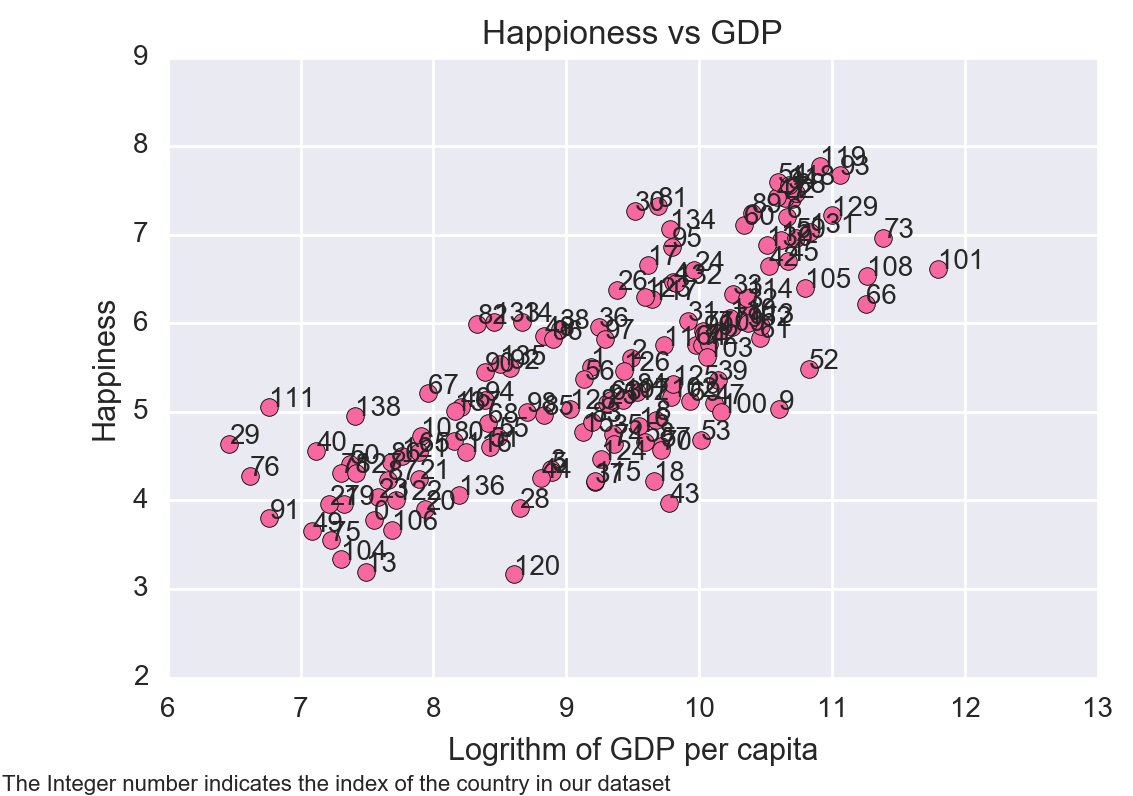

In [29]:
## Here we use the matplotlib scatter plot

fig, axes = plt.subplots(1, 1, figsize=(6,4))

axes.scatter(dataset['Log GDP per capita'], dataset['Happiness'],s=40,c='#f768a1', marker="o")
axes.set_title("Happioness vs GDP")
axes.set_xlabel("Logrithm of GDP per capita")
axes.set_ylabel("Happiness")

for i, txt in enumerate(dataset['country']):
    axes.annotate(i, (dataset['Log GDP per capita'][i],dataset['Happiness'][i]))
    
axes.annotate('The Integer number indicates the index of the country in our dataset', xy=(.8, 2.0), size=8, xycoords='figure points')

As we can see from the picture, There is a strong relation between Happiness score and GDP per capita of the country. Basically speaking, they have a linear correlation. However, if we want ask how strong GDP will affect the happiness and how GDP compares with other factors, we need to build a regression model. There are some outliers that are quite intersting. The first is country No. 120 and the second is country No. 101, the third is No. 29

In [30]:
## Country number 120

print "The country is: ",dataset.loc[120]['country']

The country is:  Syrian Arab Republic


The country has a fair high value of GDP but the people there are not quite happy! They have the lowest happy score, which indicates that there are some other factors affect their happiness.

In [31]:
## Country number 101

print "The country is: ",dataset.loc[101]['country']

The country is:  Qatar


The country has highest value of GDP but the people there are not quite happy! It also tells us that a useful model need to include other factors.

In [32]:
## Country number 29

print "The country is: ",dataset.loc[29]['country']

The country is:  Dem. Rep. Congo


The country is the democratic republic of Congo, which is also known as Congo-Kinshasa. The people in this country have the lowest GDP per capita, but they are really happy with their life!

###  Picture Total Income vs Happiness:

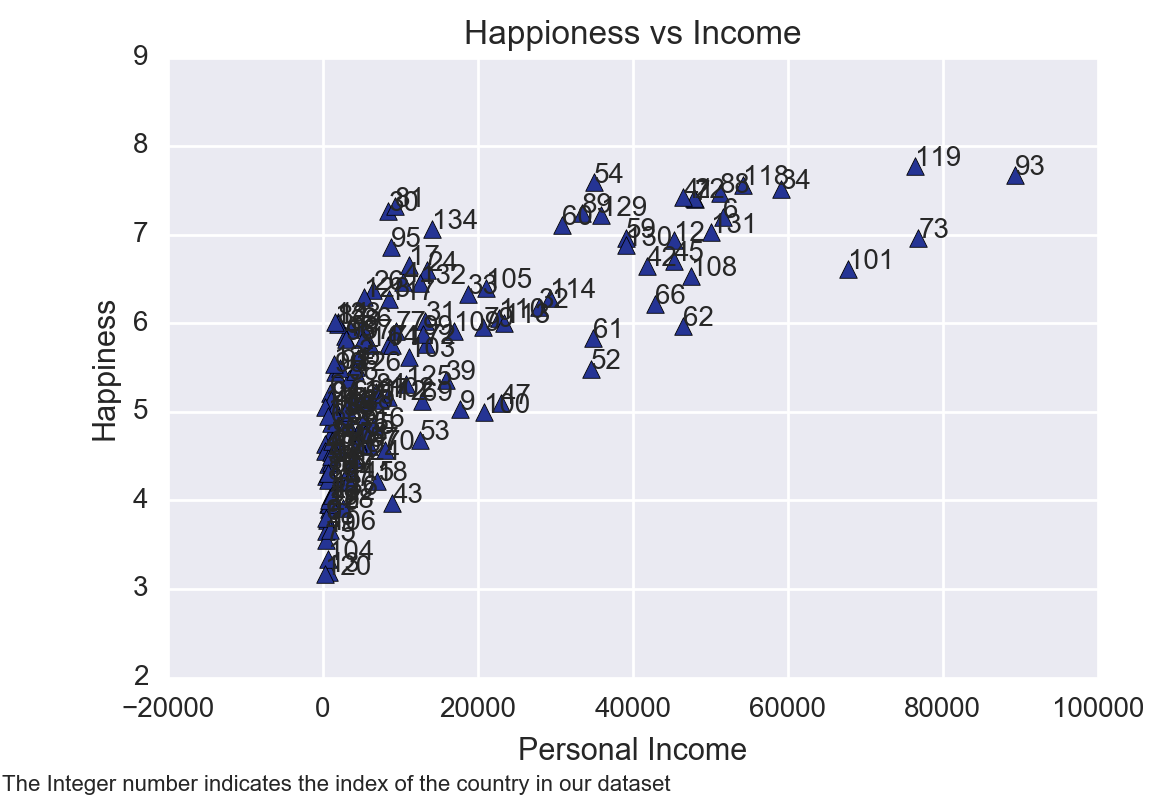

In [33]:
fig, axes = plt.subplots(1, 1, figsize=(6,4))

axes.scatter(dataset['income'], dataset['Happiness'],s=40,c='#253494', marker="^")
axes.set_title("Happioness vs Income")
axes.set_xlabel("Personal Income")
axes.set_ylabel("Happiness")

for i, txt in enumerate(dataset['country']):
    axes.annotate(i, (dataset['income'][i],dataset['Happiness'][i]))
    
axes.annotate('The Integer number indicates the index of the country in our dataset', xy=(.8, 2.0), size=8, xycoords='figure points')

The relation between Gross National Income- GNI per capita (in U.S. dollar) with Happiness. There is a correlation between GNI and Happiness, however, this relation is not a linear function. The trends of data could be explaind as follows: Starting from 0, when the country increas the total income a little bit, the people become really happy with their life. However, we the GNI higher than a given value, the increase of happiness is not significant. The value tends to a constant value.

The outlier of this picture: No. 93

In [34]:
## Country number 93

print "The country is: ",dataset.loc[93]['country']

The country is:  Norway


###  Picture Homicide vs Happiness:

The rate of crime is also an important factor that will affect the happiness of people. So let's look at the correlation between them.

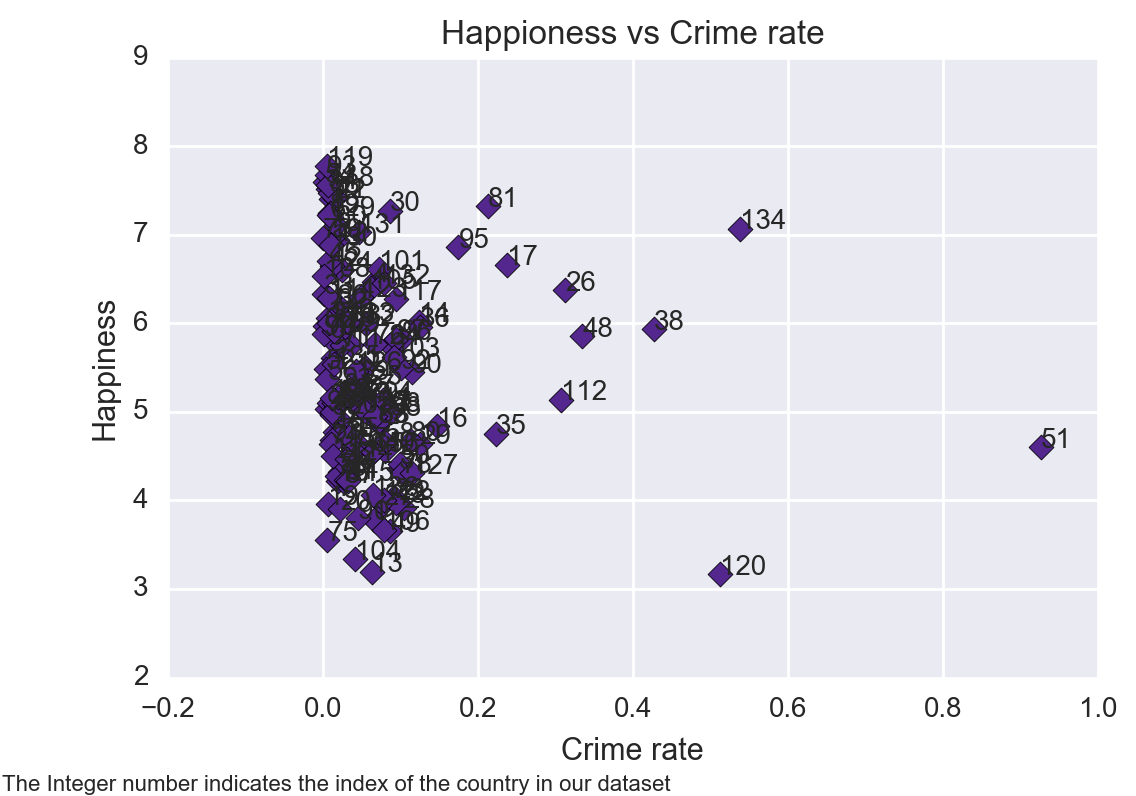

In [35]:

fig, axes = plt.subplots(1, 1, figsize=(6,4))

axes.scatter(dataset['homicide']/100, dataset['Happiness'],s=40,c='#54278f', marker="D")
axes.set_title("Happioness vs Crime rate")
axes.set_xlabel("Crime rate")
axes.set_ylabel("Happiness")

for i, txt in enumerate(dataset['country']):
    axes.annotate(i, ((dataset['homicide']/100)[i],dataset['Happiness'][i]))
    
axes.annotate('The Integer number indicates the index of the country in our dataset', xy=(.8, 2.0), size=8, xycoords='figure points')

Unfrotunately, the correlation between crime rate and Happiness score is not quite straightforward. It seems from this picture that crime rate is not an important factor to determine the happiness score. But there an outlier that quite interesting, No.51

In [36]:
## country No.51

print "The country is: ",dataset.loc[51]['country']

The country is:  Honduras


Now let's look at the distribution of the crime to see if we can understand the behavior we observed above:

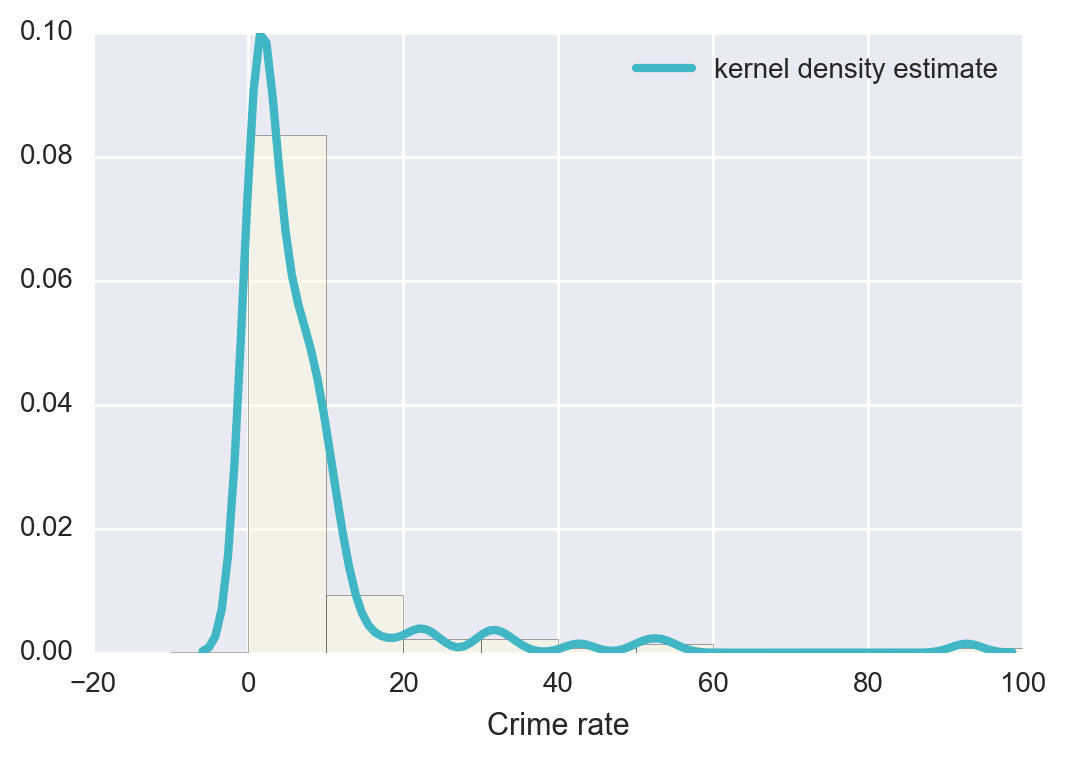

In [37]:
fig, axes = plt.subplots(1, 1, figsize=(6,4))
bins=[-10,0,10,20,30,40,50,60,70,80,90,100]
kde_kws={"color": "#41b6c4", "lw": 3, "label": "kernel density estimate"}
sb.distplot(dataset['homicide'], bins=bins,kde=True, rug=False,fit=None, hist_kws=None,kde_kws=kde_kws,color='#ffffd9', vertical=False, norm_hist=False, axlabel='Crime rate', label=None, ax=None)

Let's count the crime rate in different bins:

In [38]:
bins=[-10,0,10,20,30,40,50,60,70,80,90,100]
result=pd.cut(dataset['homicide'], bins)
pd.value_counts(result)

(0, 10]      116
(10, 20]      12
(30, 40]       3
(20, 30]       3
(50, 60]       2
(90, 100]      1
(40, 50]       1
(-10, 0]       1
(80, 90]       0
(70, 80]       0
(60, 70]       0
Name: homicide, dtype: int64

Now we understand what happens here: Combine the picture and the count calculation. For the low crime rate region [0,10] most of the countries are in this bin. So that for most countries in the world, the crime rate is not really high. So that is way we cannot expect that the crime rate is important for Happiness scroe distribution.

###  Picture Unemployment vs Happiness:

Now let's look at another factor, the unemployment rate which is definded as the percentage of the total labor force in this country. We use the rate instead of the number because the absolute value is not really useful.

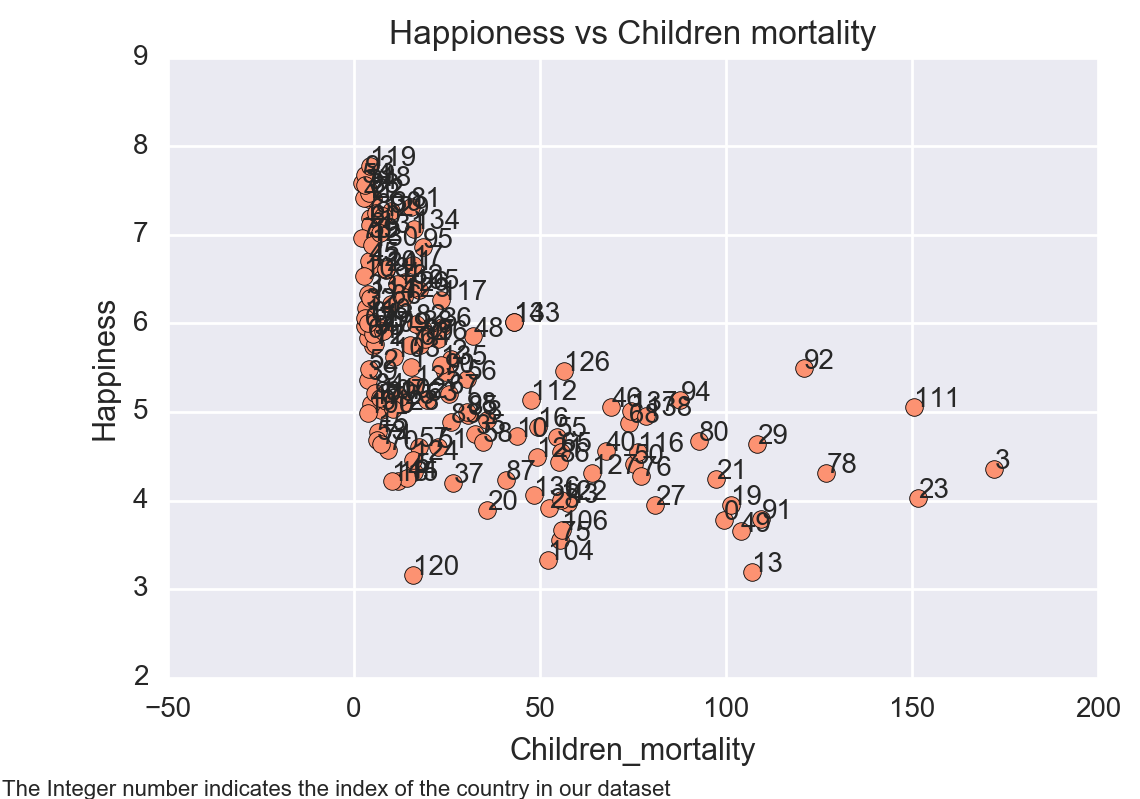

In [40]:
fig, axes = plt.subplots(1, 1, figsize=(6,4))

axes.scatter(dataset['child'], dataset['Happiness'],s=40,c='#fc9272', marker="o")
axes.set_title("Happioness vs Children mortality")
axes.set_xlabel("Children_mortality")
axes.set_ylabel("Happiness")

for i, txt in enumerate(dataset['country']):
    axes.annotate(i, ((dataset['child'])[i],dataset['Happiness'][i]))
    
axes.annotate('The Integer number indicates the index of the country in our dataset', xy=(.8, 1.0), size=8, xycoords='figure points')

So that the picture shows that the happiness and children mortatlity has a negative relation. But this is not a linear relation, it behave like a $e^-x$ function, which is decaying as the children mortality is getting bigger. The basic trends of the correlation makes sense to me. But how important this quantity is needs more investigation.

In [106]:
## Country number 120

print "The country is: ",dataset.loc[120]['country']

The country is:  Syrian Arab Republic


In [107]:
## Country number 92

print "The country is: ",dataset.loc[92]['country']

The country is:  Nigeria


###  Picture Alcohol vs Happiness:

Let's look at the last quantity relationship

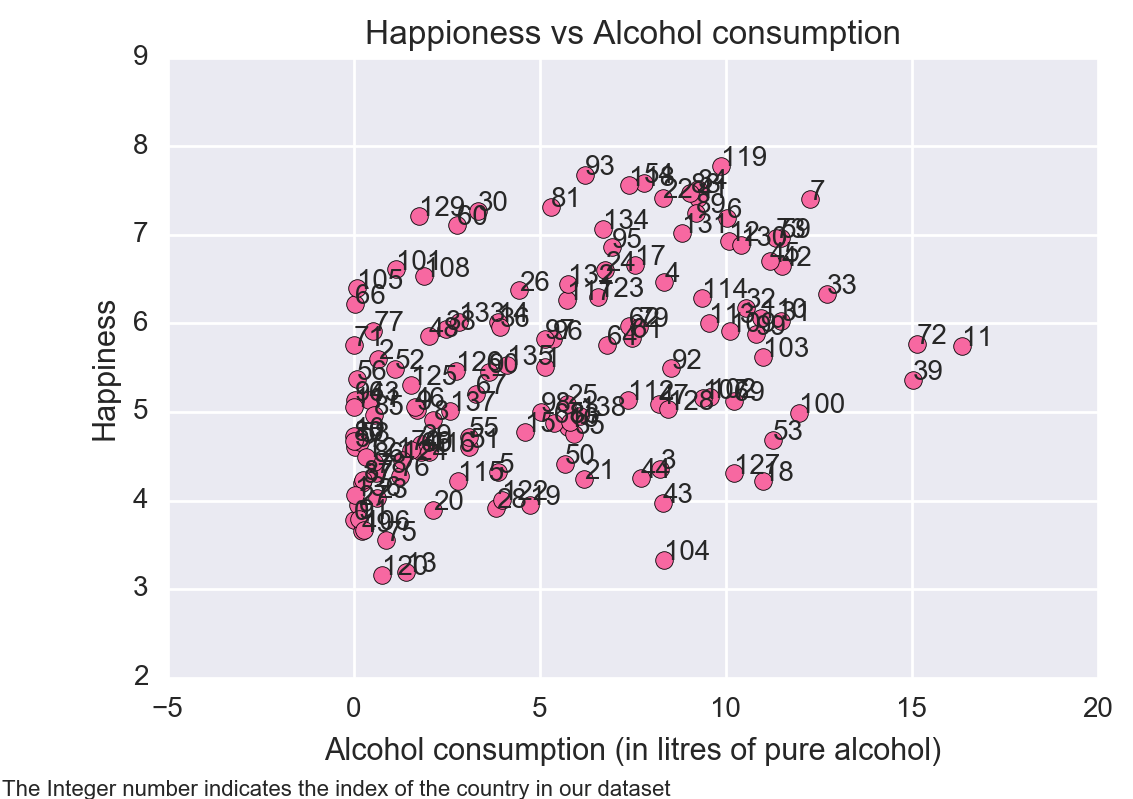

In [46]:
fig, axes = plt.subplots(1, 1, figsize=(6,4))

axes.scatter(dataset['alcohol'], dataset['Happiness'],s=40,c='#f768a1', marker="o")
axes.set_title("Happioness vs Alcohol consumption")
axes.set_xlabel("Alcohol consumption (in litres of pure alcohol)")
axes.set_ylabel("Happiness")

for i, txt in enumerate(dataset['country']):
    axes.annotate(i, ((dataset['alcohol'])[i],dataset['Happiness'][i]))
    
axes.annotate('The Integer number indicates the index of the country in our dataset', xy=(.8, 1.0), size=8, xycoords='figure points')

This picture shows no relation between alcohol consumption and Happiness score. Our conclution is: In some country people use alcohol to make them happier, but in some other country, alcohol is not that important. But in some country, the more people use alcohol, the unhappier they are. Now let's look at the Alcohol consumption distribution.

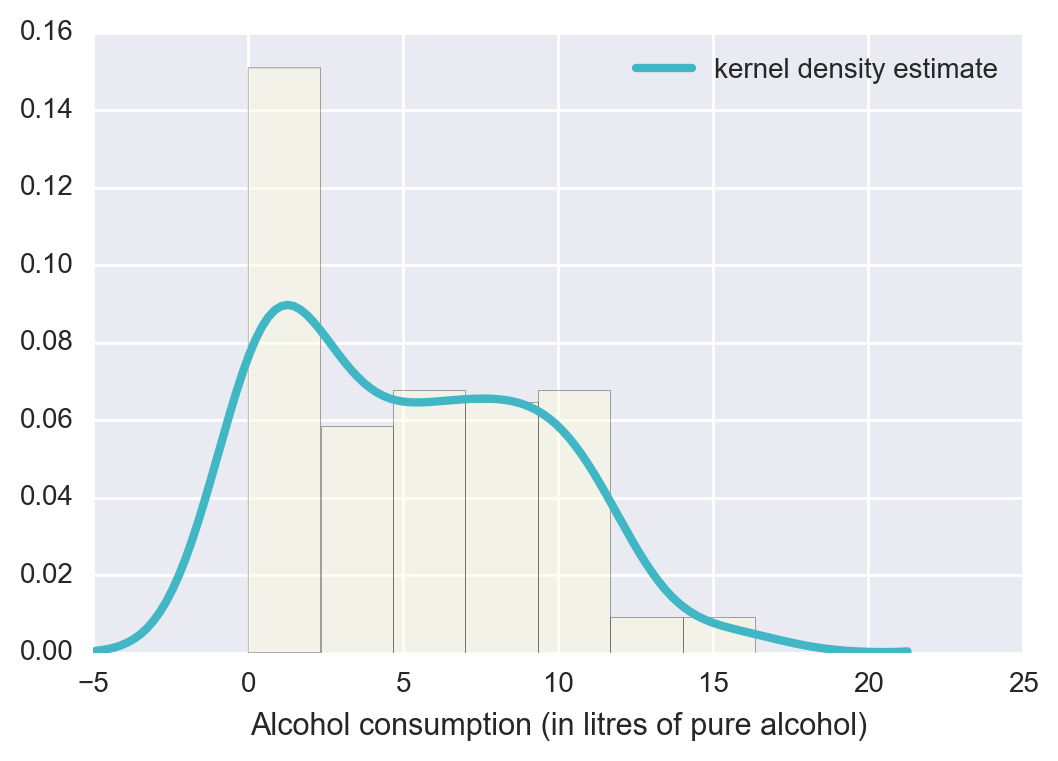

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(6,4))
kde_kws={"color": "#41b6c4", "lw": 3, "label": "kernel density estimate"}
sb.distplot(dataset['alcohol'].fillna(0.0), kde=True, rug=False,fit=None, hist_kws=None,kde_kws=kde_kws,color='#ffffd9', vertical=False, norm_hist=False, axlabel='Alcohol consumption (in litres of pure alcohol)', label=None, ax=None)

## Part 3. Data classification

In our dataset, we have two interesting quantity, which are called "Generosity" and "Social support". Their meanings are as follows:

1. Social_support: is the national average of the binary responses (either 0 or 1) to the GWP question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

2. Generosity: is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.

I am really interested in these two quantities, since they reflect the social development level. It will be interesting to categorize the type of socitey in terms of these two quantities. In this section, let's look at how to do define an appropriate quantity to do this job.

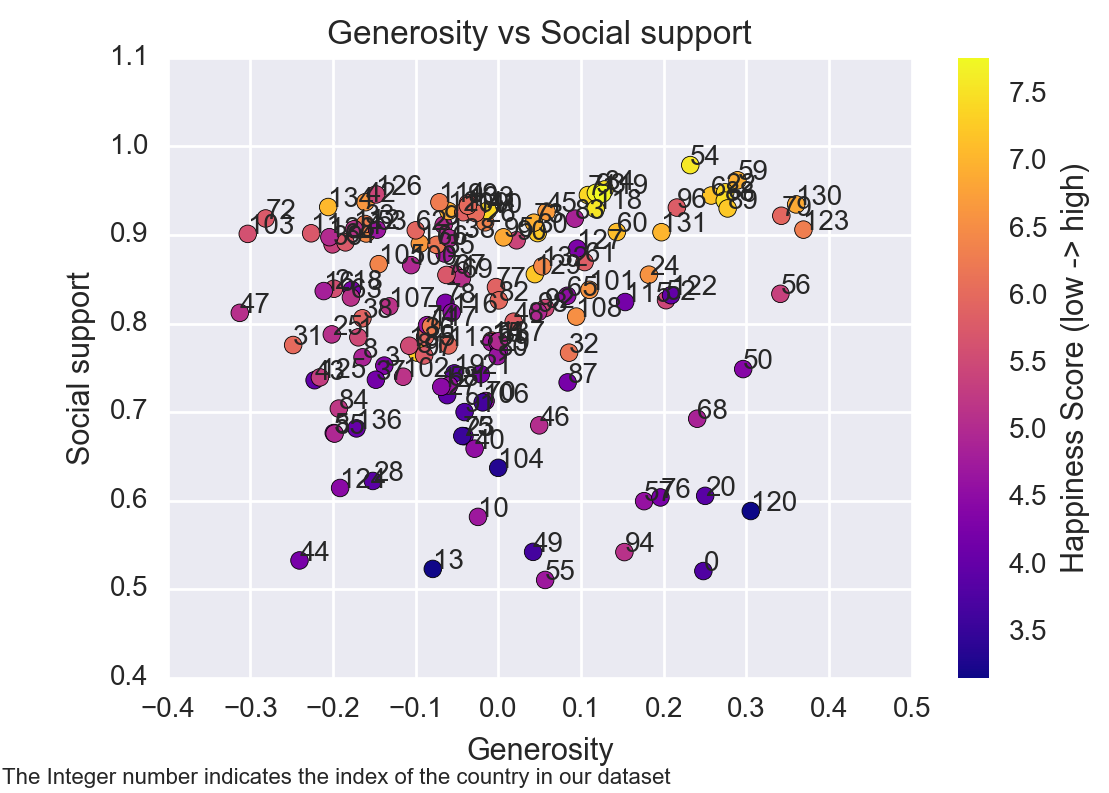

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(6,4))

a=axes.scatter(dataset['Generosity'], dataset['Social support'],s=40,c=dataset['Happiness'], marker="o",cmap=plt.cm.get_cmap('plasma'))
axes.set_title("Generosity vs Social support")
axes.set_xlabel("Generosity")
axes.set_ylabel("Social support")
cbar=plt.colorbar(a)
cbar.set_label("Happiness Score (low -> high)")

for i, txt in enumerate(dataset['country']):
    axes.annotate(i, ((dataset['Generosity'])[i],dataset['Social support'][i]))
    
axes.annotate('The Integer number indicates the index of the country in our dataset', xy=(.8, 3.2), size=8, xycoords='figure points')